In [ ]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread

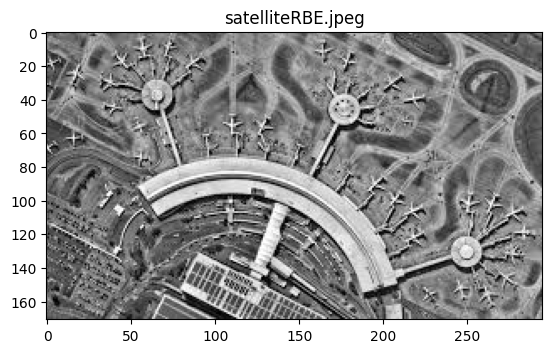

In [ ]:

image_file = "satelliteRBE.jpeg"
im = imread(image_file, as_gray=True)

fig, ax = plt.subplots()
ax.imshow(im, cmap=plt.cm.gray)
ax.set_title("satelliteRBE.jpeg")
plt.show()



In [ ]:
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)

In [ ]:
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("number of objects: " ,numrows)

number of objects:  957


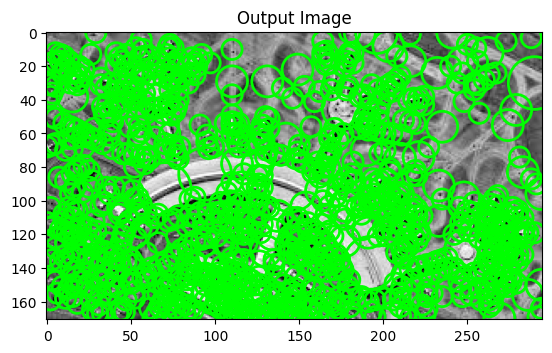

In [ ]:
image_file = "satelliteRBE.jpeg"
im = imread(image_file, as_gray=True)
blobs_log = blob_log(im, max_sigma=30, threshold=0.1)
fig, ax = plt.subplots(1, 1)
ax.imshow(im, cmap='gray')
for blob in blobs_log:
    y, x, r = blob
    c = Circle((x, y), r + 5, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)
plt.title("Output Image")
plt.show()


In [ ]:
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("number of objects: " ,numrows)

number of objects:  957


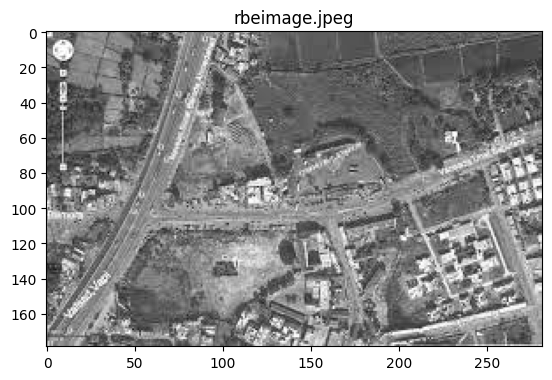

In [ ]:
image_file = "rbeimage.jpeg"
im = imread(image_file, as_gray=True)
fig, ax = plt.subplots()
ax.imshow(im, cmap=cm.gray)
ax.set_title("rbeimage.jpeg")
plt.show()

In [ ]:
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)

In [ ]:
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("number of objects: " ,numrows)

number of objects:  579


OutputImage


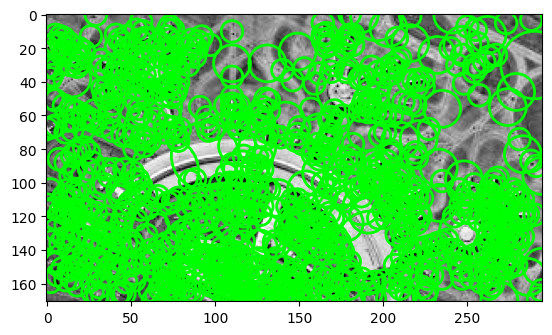

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define 'im' and 'blobs_log' or load your image and blob data here
# For example:
# im = your_image_data
# blobs_log = your_blob_data

# Assuming you have 'im' and 'blobs_log' defined, proceed with the plotting code
print("OutputImage")
fig, ax = plt.subplots(1, 1)
plt.imshow(im, cmap=cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r + 5, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
model = VGG16(weights='imagenet')
img_path = 'satelliteRBE.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")




35363/35363 [==============================] - 0s 0us/step
1: vault (0.45)
2: monastery (0.15)
3: palace (0.11)
4: fountain (0.06)
5: church (0.06)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
model = VGG16(weights='imagenet')
img_path = 'rbeimage.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=5)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 1s 757ms/step
1: suspension_bridge (0.36)
2: aircraft_carrier (0.10)
3: crane (0.06)
4: pier (0.05)
5: drilling_platform (0.05)


In [ ]:
from sklearn.metrics import accuracy_score
true_labels = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
predicted_labels = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 80.00%


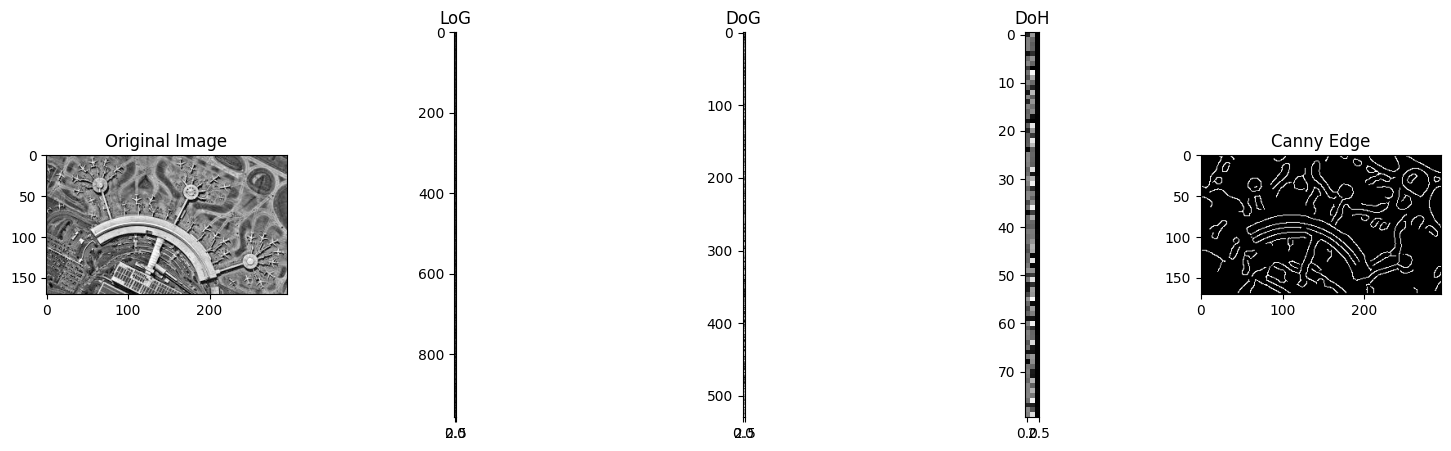

In [ ]:
# Blob detection using different algorithms
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(im, max_sigma=30, threshold=.1)

blobs_doh = blob_doh(im, max_sigma=30, threshold=.01)

# Canny edge-based method
from skimage import feature

edges = feature.canny(im, sigma=3)

# Plot the results
fig, ax = plt.subplots(1, 5, figsize=(18, 5))
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title("Original Image")

for i, (blobs, title) in enumerate(
        [(blobs_log, 'LoG'), (blobs_dog, 'DoG'), (blobs_doh, 'DoH'), (edges, 'Canny Edge')]):
    ax[i + 1].imshow(blobs, cmap=plt.cm.gray)
    ax[i + 1].set_title(title)

plt.show()

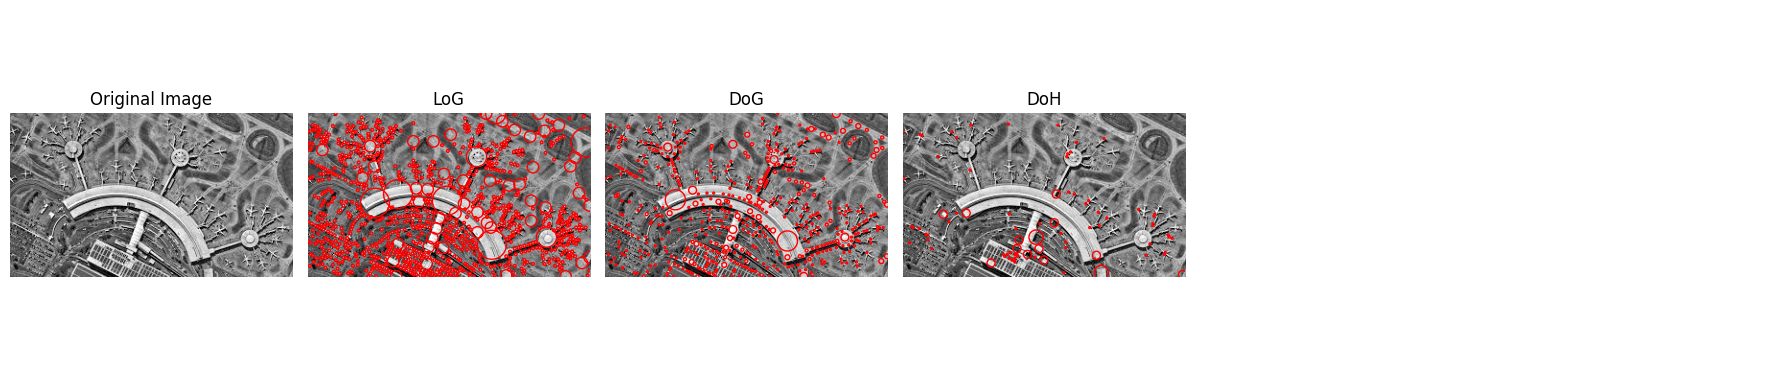

In [ ]:
from matplotlib import pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread

image_file = "satelliteRBE.jpeg"
im = imread(image_file, as_gray=True)

fig, axes = plt.subplots(1, 6, figsize=(18, 4))
ax = axes.ravel()

# Display the original image
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].set_title("Original Image")

# Blob detection using Laplacian of Gaussian (LoG)
blobs_log = blob_log(im, max_sigma=30, num_sigma=10, threshold=.1)
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

ax[1].imshow(im, cmap=plt.cm.gray)
ax[1].set_title("LoG")

for blob in blobs_log:
    y, x, area = blob
    ax[1].add_patch(plt.Circle((x, y), area, color='r', fill=False))

# Blob detection using Difference of Gaussians (DoG)
blobs_dog = blob_dog(im, max_sigma=30, threshold=.1)

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].set_title("DoG")

for blob in blobs_dog:
    y, x, area = blob
    ax[2].add_patch(plt.Circle((x, y), area, color='r', fill=False))

# Blob detection using Determinant of Hessian (DoH)
blobs_doh = blob_doh(im, max_sigma=30, threshold=.01)

ax[3].imshow(im, cmap=plt.cm.gray)
ax[3].set_title("DoH")

for blob in blobs_doh:
    y, x, area = blob
    ax[3].add_patch(plt.Circle((x, y), area, color='r', fill=False))

# You can add more blob detection algorithms here...

# Show the plots
for i in range(6):
    ax[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
true_labels = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
predicted_labels = [0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 80.00%


In [ ]:
import numpy as np


detected_blobs = np.array([(100, 100, 20), (200, 200, 30), (300, 300, 40)])
ground_truth_blobs = np.array([(105, 105, 22), (210, 200, 28), (300, 300, 40)])


radius_threshold = 10  # Adjust as needed

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

for detected_blob in detected_blobs:
    matched = False
    for gt_blob in ground_truth_blobs:
        distance = np.linalg.norm(detected_blob[:2] - gt_blob[:2])
        if distance < radius_threshold:
            true_positives += 1
            matched = True
            break

    if not matched:
        false_positives += 1


false_negatives = len(ground_truth_blobs) - true_positives

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positives+true_negatives)/(true_positives+ true_negatives+false_positives+ false_negatives)
# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print("Accuracy : ", accuracy)


Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy :  0.5
